<a href="https://colab.research.google.com/github/leehyell/AIStudy24/blob/master/%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**시나리오**
* MBC 마켓에서 이번엔 럭키백을 패션 분야에 접목하려고 한다.
* 패션 분야이므로 상품 개수가 늘어나고, 어종이 아닌 일반 잡화용으로 제공하기로 했다.

###**딥러닝의 시작**
* 인공 신경망
* MNIST 데이터셋&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;:&nbsp;&nbsp;손으로 쓴 0 ~ 9까지의 숫자로 이루어져 있음.
* 패션 MNIST 데이터셋&nbsp;&nbsp;:&nbsp;&nbsp;숫자 대신 패션 아이템으로 이루어짐.
* 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용, 텐서플로 연산을 결정적으로 만든다.

In [1]:
#텐서플로
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()
#↑ 파이참이나 다른 곳 버전 오류 해결용

#케라스 패키지 임포트
from tensorflow import keras

#load_data()가 훈련세트와 테스트세트로 데이터를 나누어 반환.(input과 target의 쌍으로 이루어져 있음.)
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
#전달 받은 데이터 크기 확인

#트레이닝 세트(6만개, 가로 28, 세로 28)
print(train_input.shape, train_target.shape)
#테스트   세트(1만개, 가로 28, 세로 28)
print(test_input.shape, test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


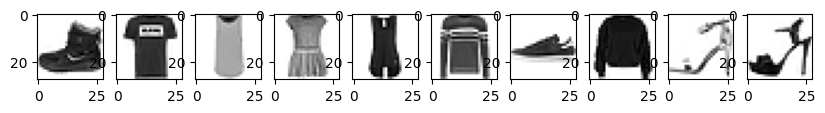

In [10]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(10, 10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('on')
plt.show()

In [14]:
#샘플 타겟 확인.
#0 티셔츠  1 바지  2 스웨터  3 드레스  4 코트  5 샌달  6 셔츠  7 스니커즈  8 가방  9 앵클부츠
print([train_target[i] for i in range(10)])
#[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [15]:
import numpy as np

#10개의 비열에 정확히 6,000개씩 샘플이 들어 있음.
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [17]:
#로지스틱 회귀로 패션 아이템 분류하기.

#6만개 전체를 한 번에 훈련하는 것보다 샘플 1개씩 꺼내서 모델을 훈련해보자.
#확률적 경사 하강법: SGDClassfier
#확률적 경사 하강법은 여러 특성 중 기울기가 가장 가파른 방향을 따라 이동.
#만약 특성마다 값의 범위가 많이 다르면 올바르게 손실 함수의 경사를 내려올 수 없음.
#패션 MNIST의 경우 흑백이기에 0 ~ 255 사이의 정수값을 가짐.
#255로 나누어 0 ~ 1 사이값으로 정규화 진행.(양수 값으로 이뤄진 이미지 전처리용.)

#reshape로 2차원 배열을 1차원 배열로 펼침.
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28 * 28)
print(train_scaled.shape)
#SGDClassfier는 2차원 지원 안 함.(28 * 28 = 784)

(60000, 784)


In [18]:
#크로스 검증
from sklearn.model_selection import cross_validate
#경사하강법
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', max_iter=5, random_state=42)
#↑ max_iter=5: 5번 반복 / ↓ cross_validate: 교차검증
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)

#5번 반복에 대한 테스트 평균
print(np.mean(scores['test_score']))

0.8194166666666666


###**로지스틱 회귀 공식**
* z = a * (Weight) + b * (Length) + c * (Diagonal) + d * (Height) + e * (Width) + f

<br/><br/>
###**선형 방정식**
* z_티셔츠 = a * (픽셀1) + b * (픽셀2) + c * (픽셀3) + d * (픽셀4) ··· + e * (픽셀784) + f(절편)
* z_바지 = a1 * (픽셀1) + b1 * (픽셀2) + c1 * (픽셀3) + d1 * (픽셀4) ··· + e1 * (픽셀784) + f1(절편)
    * 바지에 대한 출력은 티셔츠와 다른 값을 사용해야 함.(티셔츠랑 다름.)
<br/><br/><br/>
* 나머지 클래스에 대한 선형 방정식도 동일 → 10개의 클래스에 대한 선형 방정식을 모두 계산함.
* 다음 단계인 소프트 맥스 함수를 통과하여 각 클래스에 대한 확률을 얻을 수 있음.

###**인공신경망**
* artificial(아티피셜) neural(뉴럴) network, ANN
* 참고: https://todayisbetterthanyesterday.tistory.com/41

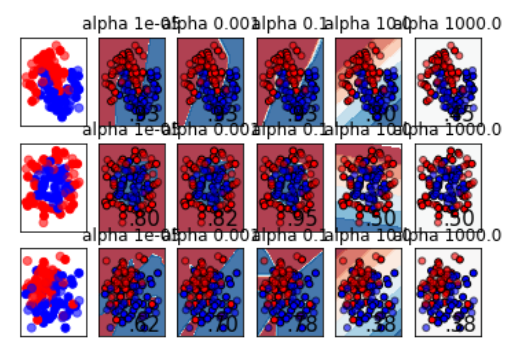

###**인공신경망을 사용해 패션 아이템 분류 문제의 성능을 높여보자.**
* z-티셔츠 ~ 클래스 10개인 x_10까지 계산하고 이를 바탕으로 클래스를 예측하기 때문에 신경망의 최종 값은 출력층.(output Layer)
* 인공신경망의 z 값 계산하는 단위를 뉴런(Neuron)이라고 부름.
    * → 선형 계산을 진행.(대부분 유닛이라고 부름.)
* 픽셀 1 ~ 874번 픽셀까지를 입력층(input layer)이라고 부름.
* z_1을 만들기 위해서 픽셀1인 x_1에 곱해지는 가중치는 w_1.1 ··· 10개의 뉴런.
* 사람 뇌에 있는 뉴런과 다름.(무언가를 만들어내는 것이 아닌 알고리즘의 일종.)
* 확률적 경사 하강법을 사용한 로지스틱 회귀 모델이 가장 간단한 인공 신경망이라면 인공 신경망을 만들어도 성능이 좋아지진 않는다.

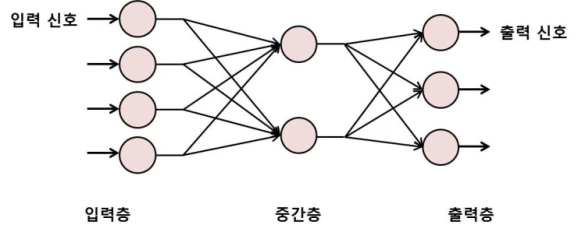
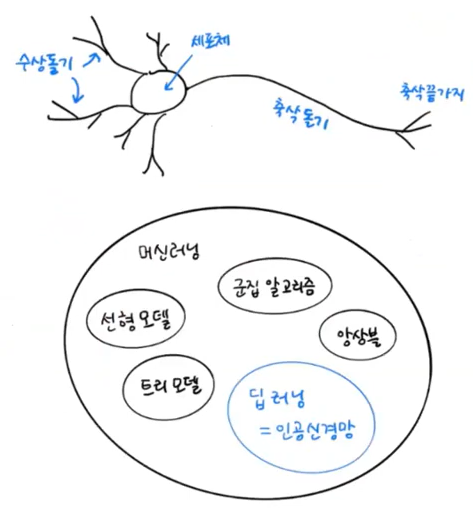

In [21]:
#딥러닝 라이브러리에서 인기 높은 텐서플로를 사용해보자.
#텐서플로(TensorFlow)
#구글이 2015년 11월 오픈소스로 공개한 딥러닝 라이브러리 이다.
#→ 알파고 시절.(이세돌 1승)
#텐서플로우 2.x 버전이 2019년 9월에 릴리스 됨.

import tensorflow as tf
#케라스: 고수준 api.
from tensorflow import keras

###**딥러닝 라이브러리는**
* **GPU(그래픽 카드)를 사용**하여 인공 신경망을 훈련함.
* → GPU는 벡터와 행렬 연산으로 3D연산에 최적화 되어 있음.
* 곱셈과 덧셈이 많이 수행되는 인공 신경망에 속도를 높여준다.
* 케라스 라이브러리는 직접 GPU 연산을 수행하지 않는다.
    * 대신 GPU 연산을 수행하는 다른 라이브러리를 백엔드로 사용.
* 텐서플로우가 케라스 백엔드로 사용할 수 있다. 멀티 - 백엔드 케라스 라고 부름.
* 케라스 API만 익히면 다양한 딥러닝 라이브러리를 입맛대로 골라서 사용할 수 있다.
    * → 직관적이고 사용하기 편함

###**인공 신경망으로 모델 만들기**
* 앞에서 만든 train_scaled, train_target 사용.
* 인공 신경망에서는 교차 검증을 사용하지 않고 검증 세트를 별도로 덜어내어 사용.
    * 이유1: 딥러닝 분야의 데이터 셋은 충분히 크기 때문에 검증 점수가 안정적.
    * 이유2: 교차 검증을 수행하기에 훈련시간이 너무 오래 걸림.
        * pit 시간이 몇 시간, 며칠이 걸릴 수 있음.

In [22]:
from sklearn.model_selection import train_test_split

#train_scaled(트레이닝 스케일), val_scaled(값 스케일; 검증세트 20%)
#train_target(트레이닝 타겟), val_target(값 타겟; 검증세트 20%)
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

#훈련세트 48,000
print(train_scaled.shape,train_target.shape)
#테스트세트 12,000
print(val_scaled.shape,val_target.shape)
#총 60,000개

(48000, 784) (48000,)
(12000, 784) (12000,)


###**딥러닝에서는**
* **다양한 종류의 층을 추가**하는 식으로 모델을 만듦.
* 이번 장에서는 Dense 층을 사용.
    * 밀집층, 완전 연결층, fully connteced layer
* 10개의 유닛
    * 다중 분류이므로 활성화 함수는 소프트맥스, 입력 값은 784개의 원소로 이루어진 1차원 배열.
    * (이진 분류일 때는 시그모이드 함수를 사용.)
* 케라스는 첫 번째 층에 입력 크기를 넣어야 함.
* 그 다음 추가되는 층은 자동으로 계산되기 때문에 넣을 필요 없음.
    * 케라스 모델은 Sequential 클래스로 만듦.
* 인공신경망의 오른쪽에 놓은 층을 만듦.
* 10개의 패션 아이템을 분류하기 위해 10개의 뉴런으로 구성.
* 케라스의 레이어 패키지 안에 다양한 층 존재.
    * 가장 기본이 되는 층은 **밀집층**.
    * 밀집층(dense layer): 784개의 픽셀과 10개의 뉴런이 모두 연결된 선이라는 뜻.
        * 총 784 * 10 = 7840개의 연결선이 있다.
        * 이런 층을 뉴런이 모두 연결하고 있어 완전 연결층(fully connected layer)라고 함.

In [23]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))
#뉴런 개수 / 뉴런에 적용할 함수 / 입력 크기
#activation='softmax' 출력되는 값을 확률로 바꿈. → 다중분류.
#activation='sigmoid' 이진분류.
#입력의 크기는 10개의 뉴런이 각각 몇 개의 입력을 받는지 튜플로 지정함.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
#이제 밀집층을 가진 신경망 모델을 만들자.
model = keras.Sequential([dense])
#밀집층을 가진 신경망 모델을 만듦. Sequential(순차적구조) 클래스를 사용.
#Sequential 클래스의 객체를 만들 때 앞에서 만든 밀집층의 객체 dense를 전달함.
#여기서 만든 model 객체가 바로 신경망 모델.

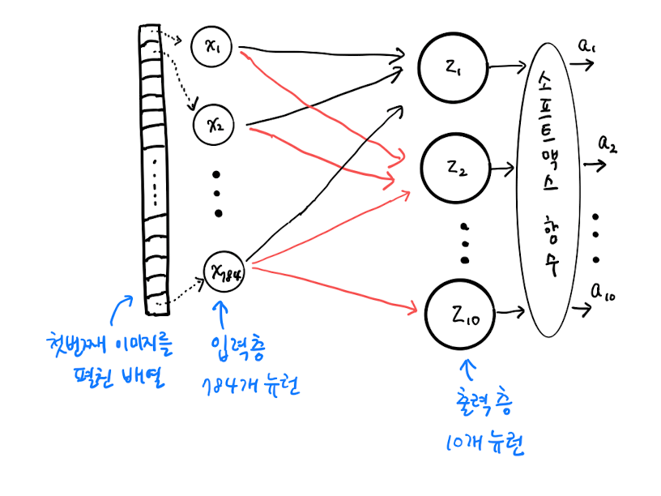

###**활성화 함수**
* 소프트맥스와 같이 뉴런의 선형 방정식 계산 결과에 적용되는 함수를 **활성화 함수**라고 함.
    * 위 그림을 보면 a 표시 되어 있음.

<br/><br/>
###**인공신경망으로 패션 아이템 분류하기**
* 케라스 모델 훈련 전 설정 단계
    * model 객체의 compile() 메소드에서 수행.
    * 손실함수 loss='sparse_categorical_crossentropy'
        * 히소 다중분류 손실 함수 → 정수 타겟
    * loss='sparse_binary_crossentropy'
        * 히소 이진분류 손실 함수 → 이진 타겟
    * 측정값 metrics=['accuracy'] → 정확도(에큐러시)의 지표가 됨.
* 케라스는 자동으로 에포크마다 손실을 기록함.
    * 추가로 정확도를 기록하기 위해 metrics를 넣음.

In [25]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

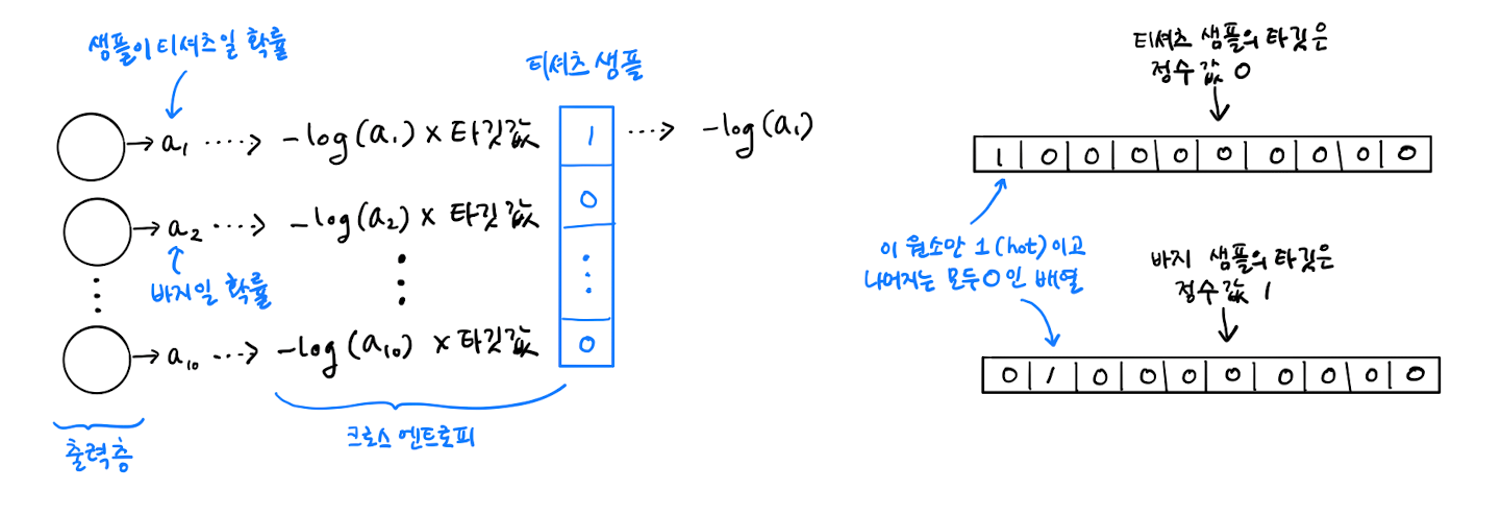

In [27]:
#정수형으로 타겟 생성 → 원-핫 인코딩
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


In [28]:
#훈련시작.(에포크 5로 5번 훈련)
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7370 - loss: 0.7853
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8346 - loss: 0.4845
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8452 - loss: 0.4564
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8504 - loss: 0.4425
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8537 - loss: 0.4337


In [29]:
#에포크마다 걸린 시간, 정확도, 손실
#0.8537 높은 점수를 받음.

#케라스 모델의 성능 평가하는 메소드 evaluate(이밸류에이트)
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8462 - loss: 0.4364


[0.4444445073604584, 0.8458333611488342]

###**사이킷런과 케라스 모델 비교**
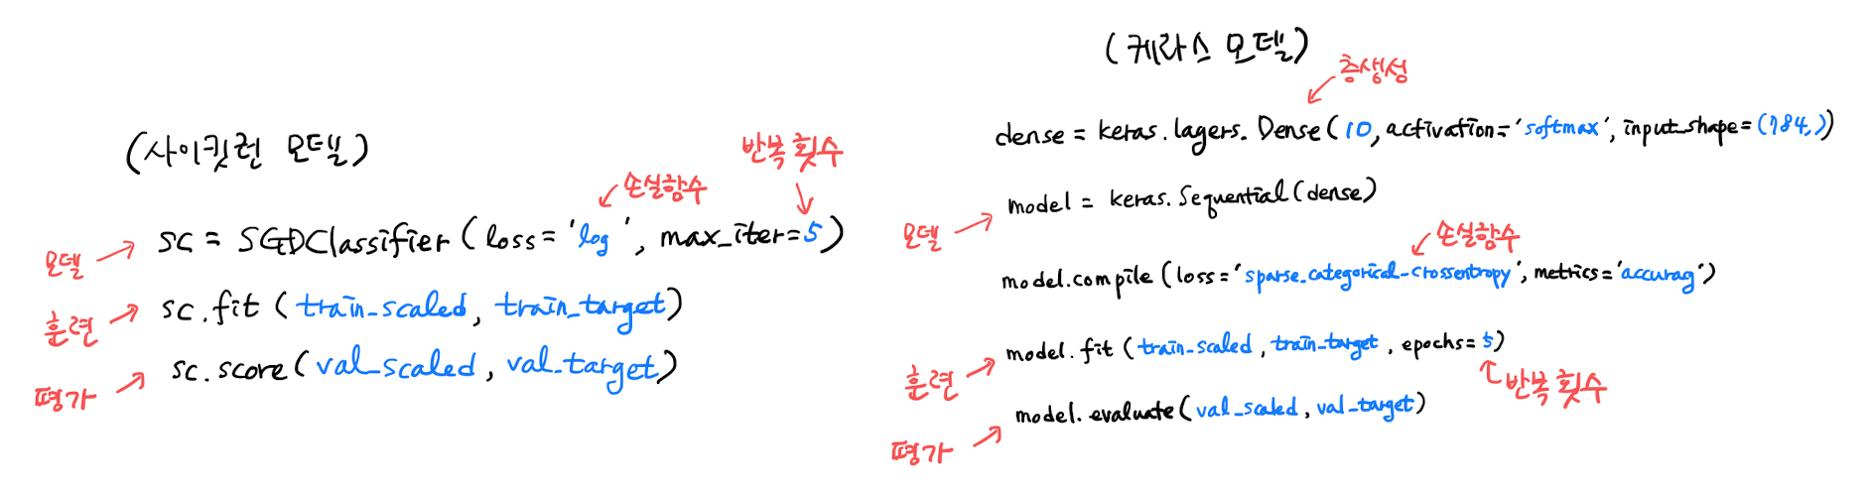